In [1]:
%pylab qt
%matplotlib inline

import scipy.constants as cst
import fitting
from scipy.fftpack import fft as fft

def make_fft(x,y):
    N = len(x)
    T = x[1]-x[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return xf, 2.0/N * np.abs(yf[0:N//2])

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)
    
def lowpass(t, y, fc):
    Te = t[1]-t[0]
    tau = 1/(2*np.pi*fc)
    filtered_y = [0]
    for i, val in enumerate(y):
        if i==0:
            pass
        else:
            a = tau/Te
            filtered_y.append((a/(1+a))*filtered_y[-1]+1/(1+a) * val)
    return np.array(filtered_y)

def lowpass_tf(f,fc):
    return 1 / (1+1j*f/fc)

def square(x, f):
    return np.sign(np.sin(2*np.pi*f*x))

Populating the interactive namespace from numpy and matplotlib


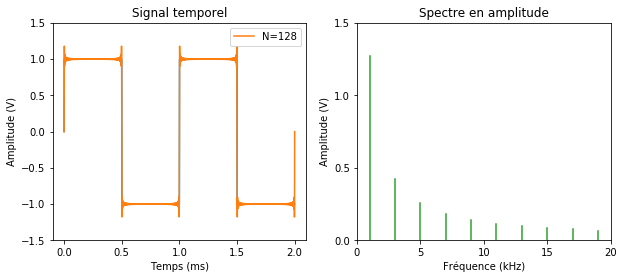

In [3]:
x = np.linspace(0,2,10001)
y = np.sign(np.sin(2*np.pi*x))

def coef(n):
    return 4/np.pi / (2*n+1) 

def component(x, f=1, n=0):
    return coef(n) * np.sin((2*n+1)*2*np.pi*f*x)

f = 1

for N in [1,2,4,8,16,32,64,128]:
    y_fourier = np.zeros(len(x))
    for n in range(N):
        y_fourier += component(x, f=1, n=n)

    plt.figure(1, figsize=(10,4))
    sps = (1,2)
    ax1 = plt.subplot2grid(sps, (0,0))
    ax2 = plt.subplot2grid(sps, (0,1))

    ax1.plot(x, y)
    ax1.plot(x, y_fourier, label="N="+str(N))
    ax1.set_xlabel("Temps (ms)")
    ax1.set_ylabel("Amplitude (V)")
    ax1.set_ylim(-1.5,1.5)
    ax1.set_title("Signal temporel")
    ax1.legend(loc="upper right")
    ax1.set_xticks([0,0.5,1,1.5,2])
    
    for n in range(N):
        fn = (2*n+1)*f
        an = coef(n)
        ax2.plot([fn, fn], [0, an], "-C2")
    ax2.set_xlabel("Fréquence (kHz)")
    ax2.set_ylabel("Amplitude (V)")
    ax2.set_ylim(0,1.5)
    ax2.set_xlim(0,20)
    ax2.set_title("Spectre en amplitude")
    ax2.set_xticks([0,5,10,15,20])
    ax2.set_yticks([0,0.5,1,1.5])


    #mysavefig("square_"+str(N)+".png")

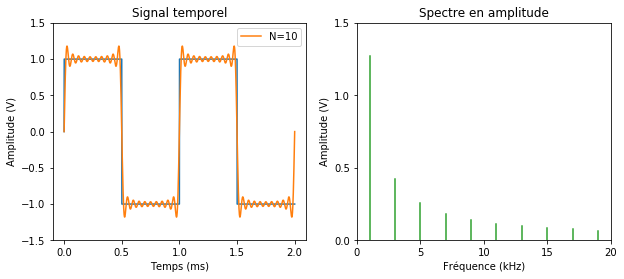

In [3]:
x = np.linspace(0,2,10001)
y = np.sign(np.sin(2*np.pi*x))

def coef(n):
    return 4/np.pi / (2*n+1) 

def component(x, f=1, n=0):
    return coef(n) * np.sin((2*n+1)*2*np.pi*f*x)

f = 1
N = 10

y_fourier = np.zeros(len(x))
for n in range(N):
    y_fourier += component(x, f=1, n=n)

plt.figure(1, figsize=(10,4))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

ax1.plot(x, y)
ax1.plot(x, y_fourier, label="N="+str(N))
ax1.set_xlabel("Temps (ms)")
ax1.set_ylabel("Amplitude (V)")
ax1.set_ylim(-1.5,1.5)
ax1.set_title("Signal temporel")
ax1.legend(loc="upper right")
ax1.set_xticks([0,0.5,1,1.5,2])

for n in range(N):
    fn = (2*n+1)*f
    an = coef(n)
    ax2.plot([fn, fn], [0, an], "-C2")
ax2.set_xlabel("Fréquence (kHz)")
ax2.set_ylabel("Amplitude (V)")
ax2.set_ylim(0,1.5)
ax2.set_xlim(0,20)
ax2.set_title("Spectre en amplitude")
ax2.set_xticks([0,5,10,15,20])
ax2.set_yticks([0,0.5,1,1.5])

#mysavefig("square_"+str(N)+".png")

In [62]:
fp= 20
fs = 1
m  = 0.5
x    = np.linspace(0,2,10001)
s_p  = np.cos(2*np.pi*fp*x)
s    = 1 + m * np.cos(2*np.pi*fs*x)
s_am = (np.cos(2*np.pi*fp*x) + m/2 * np.cos(2*np.pi*(fp-fs)*x) + m/2 * np.cos(2*np.pi*(fp+fs)*x))
s_dm = s_am*np.cos(2*np.pi*fp*x)

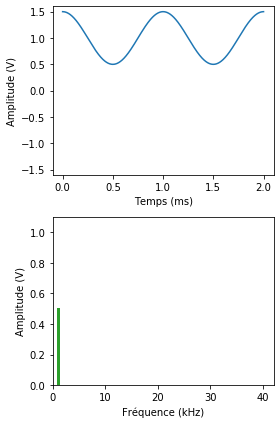

In [63]:
plt.figure(1, figsize=(4,6))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

ax1.plot(x, s)
ax2.plot([fs, fs], [0, m], "C2", linewidth=3)

ax1.set_xlabel("Temps (ms)")
ax2.set_xlabel("Fréquence (kHz)")
ax1.set_ylabel("Amplitude (V)")
ax2.set_ylabel("Amplitude (V)")

ax1.set_ylim(-1.6,1.6)
ax2.set_ylim(-0,1.1)
ax2.set_xlim(0,42)

mysavefig("signal.png")

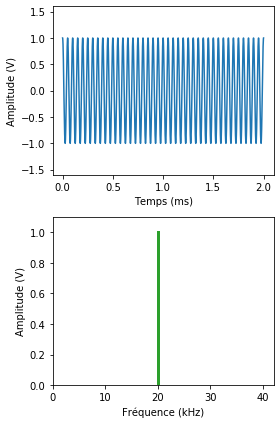

In [64]:
plt.figure(1, figsize=(4,6))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

ax1.plot(x, s_p)
ax2.plot([fp, fp], [0, 1], "C2", linewidth=3)

ax1.set_xlabel("Temps (ms)")
ax2.set_xlabel("Fréquence (kHz)")
ax1.set_ylabel("Amplitude (V)")
ax2.set_ylabel("Amplitude (V)")

ax1.set_ylim(-1.6,1.6)
ax2.set_ylim(0,1.1)
ax2.set_xlim(0,42)

mysavefig("carrier.png")

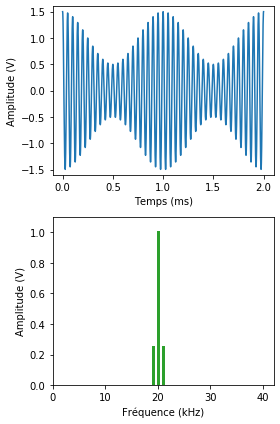

In [65]:
plt.figure(1, figsize=(4,6))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

ax1.plot(x, s_am)
ax2.plot([fp-fs, fp-fs], [0, m/2], "C2", linewidth=3)
ax2.plot([fp, fp], [0, 1], "C2", linewidth=3)
ax2.plot([fp+fs, fp+fs], [0, m/2], "C2", linewidth=3)

ax1.set_xlabel("Temps (ms)")
ax2.set_xlabel("Fréquence (kHz)")
ax1.set_ylabel("Amplitude (V)")
ax2.set_ylabel("Amplitude (V)")

ax1.set_ylim(-1.6,1.6)
ax2.set_ylim(0,1.1)
ax2.set_xlim(0,42)

mysavefig("amplitude_modulation.png")

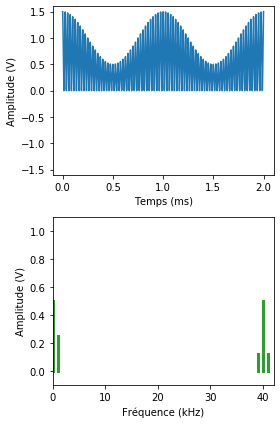

In [66]:
plt.figure(1, figsize=(4,6))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

ax1.plot(x, s_dm)
ax2.plot([0, 0], [0, 1/2], "C2", linewidth=3)
ax2.plot([fs, fs], [0, m/2], "C2", linewidth=3)
ax2.plot([2*fp-fs, 2*fp-fs], [0, m/4], "C2", linewidth=3)
ax2.plot([2*fp, 2*fp], [0, 1/2], "C2", linewidth=3)
ax2.plot([2*fp+fs, 2*fp+fs], [0, m/4], "C2", linewidth=3)

ax1.set_xlabel("Temps (ms)")
ax2.set_xlabel("Fréquence (kHz)")
ax1.set_ylabel("Amplitude (V)")
ax2.set_ylabel("Amplitude (V)")

ax1.set_ylim(-1.6,1.6)
ax2.set_ylim(-0.1,1.1)
ax2.set_xlim(0,42)

mysavefig("amplitude_demodulation.png")

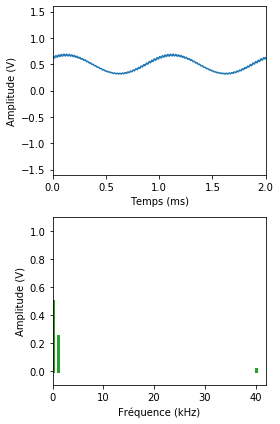

In [70]:
fp= 20
fs = 1
m  = 0.5
x    = np.linspace(-4,2,20001)
s_p  = np.cos(2*np.pi*fp*x)
s    = 1 + m * np.cos(2*np.pi*fs*x)
s_am = (np.cos(2*np.pi*fp*x) + m/2 * np.cos(2*np.pi*(fp-fs)*x) + m/2 * np.cos(2*np.pi*(fp+fs)*x))
s_dm = s_am*np.cos(2*np.pi*fp*x)

plt.figure(1, figsize=(4,6))
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

ax1.plot(x, lowpass(x,s_dm,1))
ax2.plot([0, 0], [0, 1/2], "C2", linewidth=3)
ax2.plot([fs, fs], [0, m/2], "C2", linewidth=3)
ax2.plot([2*fp-fs, 2*fp-fs], [0, np.abs(lowpass_tf(2*fp-fs, 1))*m/4], "C2", linewidth=3)
ax2.plot([2*fp, 2*fp], [0, np.abs(lowpass_tf(2*fp, 1))*1/2], "C2", linewidth=3)
ax2.plot([2*fp+fs, 2*fp+fs], [0, np.abs(lowpass_tf(2*fp+fs, 1))*m/4], "C2", linewidth=3)

ax1.set_xlabel("Temps (ms)")
ax2.set_xlabel("Fréquence (kHz)")
ax1.set_ylabel("Amplitude (V)")
ax2.set_ylabel("Amplitude (V)")

ax1.set_ylim(-1.6,1.6)
ax1.set_xlim(0,2)
ax2.set_ylim(-0.1,1.1)
ax2.set_xlim(0,42)

mysavefig("amplitude_demodulation_filtered.png")

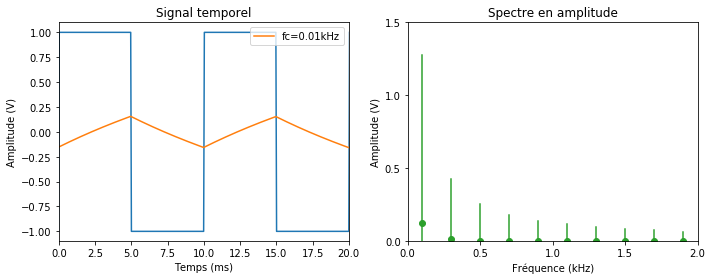

In [29]:
for i, fc in enumerate([1000, 500, 200, 100, 50, 20, 10]):
    plt.figure(1, figsize=(10,4))
    sps = (1,2)
    ax1 = plt.subplot2grid(sps, (0,0))
    ax2 = plt.subplot2grid(sps, (0,1))

    f = 100
    #fc = 200
    t = np.linspace(-0.1,0.1, 2**12)
    y = np.sign(np.sin(2*np.pi*f*t))

    filtered_y = lowpass(t,y,fc)

    ax1.plot(t*1e3, y)
    ax1.plot(t*1e3, filtered_y, label = "fc="+str(fc*1e-3)+"kHz")
    ax1.set_xlim(0,20)

    ax1.set_xlabel("Temps (ms)")
    ax1.set_ylabel("Amplitude (V)")
    ax1.set_title("Signal temporel")
    ax1.legend(loc="upper right")

    for n in range(N):
        fn = (2*n+1)*f
        an = coef(n)
        ax2.plot(np.array([fn, fn])*1e-3, [0, an], "-C2")
    for n in range(N):
        fn = (2*n+1)*f
        an = coef(n)
        ax2.plot(np.array([fn])*1e-3, [np.abs(an*lowpass_tf(fn, fc))], "oC2")
    ax2.set_xlabel("Fréquence (kHz)")
    ax2.set_ylabel("Amplitude (V)")
    ax2.set_ylim(0,1.5)
    ax2.set_xlim(0,2)
    ax2.set_title("Spectre en amplitude")
    ax2.set_xticks([0,0.5,1,1.5,2.0])
    ax2.set_yticks([0,0.5,1,1.5])
    mysavefig("lowpass_"+str(fc)+".png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Spectre en amplitude')

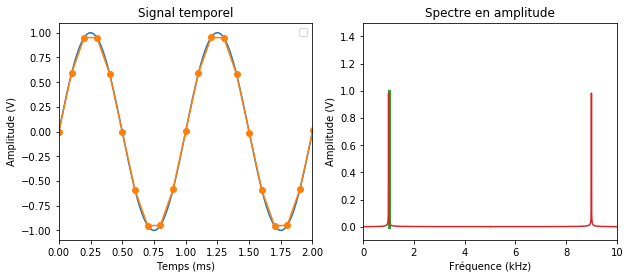

In [104]:
f = 1e3

plt.figure(1, figsize=(10,4))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

t = np.linspace(0,5e-3, 2**12)
y = np.sin(2*np.pi*f*t)

ax1.plot(t*1e3,y)
ax2.plot([1,1], [0,1], "C2", linewidth=3)

fe = 1e4

t = np.linspace(0,0.1, 0.1*fe)
y = np.sin(2*np.pi*f*t)
ax1.plot(t*1e3,y ,"-o")

xf, yf = make_fft(t,y)
ax2.plot(xf*1e-3,yf, "C3")
ax2.plot((fe-xf)*1e-3,yf, "C3")


ax1.set_xlabel("Temps (ms)")
ax1.set_ylabel("Amplitude (V)")
ax1.set_title("Signal temporel")
ax1.legend(loc="upper right")
ax1.set_xlim(0,2)

ax2.set_xlabel("Fréquence (kHz)")
ax2.set_ylabel("Amplitude (V)")
ax2.set_ylim(-0.1,1.5)
ax2.set_xlim(0,10)
ax2.set_title("Spectre en amplitude")
#mysavefig("lowpass_"+str(fc)+".png")

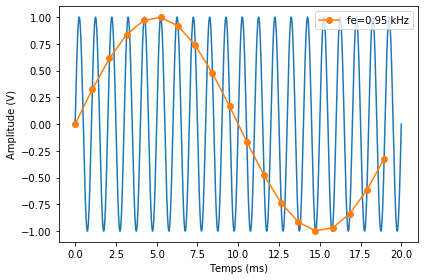

In [140]:
f = 1e3
fe = 950

T = 20e-3

plt.figure(1, figsize=(6,4))
sps = (1,1)
ax1 = plt.subplot2grid(sps, (0,0))

t = np.linspace(0,T, 2**12)
y = np.sin(2*np.pi*f*t)
ax1.plot(t*1e3,y)

t = np.arange(0,T, 1/fe)
y = np.sin(2*np.pi*f*t)
ax1.plot(t*1e3,y ,"-o", label="fe="+str(0.95)+" kHz")

ax1.set_xlabel("Temps (ms)")
ax1.set_ylabel("Amplitude (V)")
ax1.legend(loc="upper right")

mysavefig("echantillonage_3.png")

No handles with labels found to put in legend.


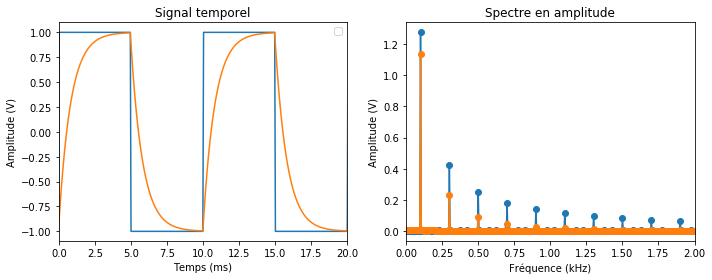

In [32]:
plt.figure(1, figsize=(10,4))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

f = 100
fc = 200
t = np.linspace(-0.1,0.1, 2**12)
y = np.sign(np.sin(2*np.pi*f*t))

filtered_y = lowpass(t,y,fc)
#for i in range(500):
#    filtered_y = lowpass(t,filtered_y,fc)

ax1.plot(t*1e3, y)
ax1.plot(t*1e3, filtered_y)
ax1.set_xlim(0,0.02*1e3)

xf, yf = make_fft(t,y)
ax2.plot(xf*1e-3, yf, '-o')

xf, yf = make_fft(t,filtered_y)
ax2.plot(xf*1e-3, yf, '-o')
ax2.set_xlim(0,2)

ax1.set_xlabel("Temps (ms)")
ax1.set_ylabel("Amplitude (V)")
ax1.set_title("Signal temporel")
ax1.legend(loc="upper right")

ax2.set_xlabel("Fréquence (kHz)")
ax2.set_ylabel("Amplitude (V)")
ax2.set_title("Spectre en amplitude")
mysavefig("numerical_square_filtering.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


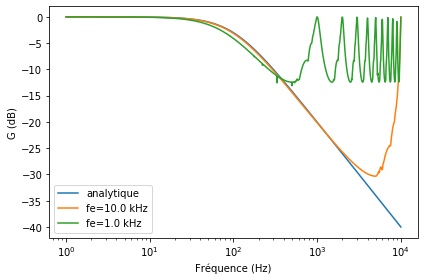

In [6]:
fc = 100
freq = np.logspace(0,4, 1000)

plt.semilogx(freq, 20*np.log10(np.abs(lowpass_tf(freq, fc))), label="analytique")

for fe in [1e4, 1e3]:
    h = []
    time = np.linspace(0,1, fe)
    for f in freq:
        y = np.sin(2*np.pi*f*time)
        filtered_y = lowpass(time,y,fc)
        a = abs(min(filtered_y))
        h.append(a)

    plt.semilogx(freq, 20*np.log10(h), label="fe="+str(fe*1e-3)+" kHz")

plt.xlabel("Fréquence (Hz)")
plt.ylabel("G (dB)")
plt.legend(loc="lower left")

mysavefig("numerical_filtering.png")

# Filtrage passe-bas numérique

In [29]:
def show_lowpass_filter(fc, f=100, n=1):
    plt.figure(1, figsize=(10,4))
    sps = (1,2)
    ax1 = plt.subplot2grid(sps, (0,0))
    ax2 = plt.subplot2grid(sps, (0,1))

    t = np.linspace(-1,1, 2**12)
    y = np.sign(np.sin(2*np.pi*f*t))
    y = np.abs(np.sin(2*np.pi*f*t))
    y = np.sin(2*np.pi*f*t)
    new_y = []
    for val in y:
        if val>0:
            new_y.append(val)
        else:
            new_y.append(0)
    y = new_y
    
    filtered_y = lowpass(t,y,fc)
    if n > 1:
        for i in range(n-1):
            filtered_y = lowpass(t,filtered_y,fc)

    ax1.plot(t*1e3, y)
    ax1.plot(t*1e3, filtered_y)
    ax1.set_xlim(0,2/f*1e3)

    xf, yf = make_fft(t,y)
    ax2.plot(xf*1e-3, yf, '-o')

    xf, yf = make_fft(t,filtered_y)
    ax2.plot(xf*1e-3, yf, '-o')
    ax2.set_xlim(0,2)

    ax1.set_xlabel("Temps (ms)")
    ax1.set_ylabel("Amplitude (V)")
    ax1.set_title("Signal temporel")

    ax2.set_xlabel("Fréquence (kHz)")
    ax2.set_ylabel("Amplitude (V)")
    ax2.set_title("Spectre en amplitude")

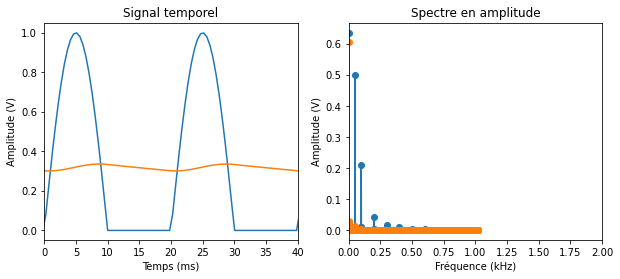

In [30]:
RC = 0.1
fc = 1/(2*np.pi*RC)
show_lowpass_filter(fc, f=50, n=1)

# Non causal filter

Pour montrer l'importance de la phase !

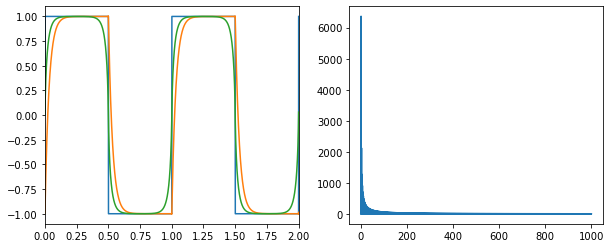

In [7]:
import matplotlib.mlab as mlab

def lowpass_tf(f,fc):
    return 1 / (1+1j*f/fc)

def lowpass_amp(f,fc):
    return np.abs(lowpass_tf(f,fc))

fc = 5

plt.figure(1, figsize=(10,4))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

x = np.linspace(0,5, 10001)
y = square(x, 1)
dt = x[1] - x[0]

N = len(x)
freqs = np.fft.rfftfreq(N, dt)
yfft = np.fft.rfft(y)

ax1.plot(x,y)
ax1.set_xlim(0,2)
ax2.plot(freqs, np.abs(yfft))

yfft_causal = yfft * lowpass_tf(freqs, fc)
y = np.fft.irfft(yfft_causal, n=N)
ax1.plot(x,y)

yfft_non_causal = yfft * lowpass_amp(freqs, fc)
y = np.fft.irfft(yfft_non_causal, n=N)
ax1.plot(x,y)